In [1]:
import pandas as pd
import gurobipy as gp
import numpy as np
from gurobipy import GRB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_data = pd.read_csv('index_data.csv')
roi_data = pd.read_csv('ROI_data.csv')
Monthly_ROI = pd.read_csv('ROI_mat.csv')

In [3]:
index_data

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,1,13,25,37,49,61,73,85,97,109
1,February,2,14,26,38,50,62,74,86,98,110
2,March,3,15,27,39,51,63,75,87,99,111
3,April,4,16,28,40,52,64,76,88,100,112
4,May,5,17,29,41,53,65,77,89,101,113
5,June,6,18,30,42,54,66,78,90,102,114
6,July,7,19,31,43,55,67,79,91,103,115
7,August,8,20,32,44,56,68,80,92,104,116
8,September,9,21,33,45,57,69,81,93,105,117
9,October,10,22,34,46,58,70,82,94,106,118


In [4]:
roi_data.head()

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [5]:
Monthly_ROI

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


### Optimum allocation based on Firm 1's allocation

In [6]:
# Total investment budget
total_budget = 10_000_000

platforms = roi_data.columns[1:]
model_firm_1 = gp.Model("MarketingOptimization_Firm_1")


x_model_1 = {platform: model_firm_1.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=3_000_000, name=f"x_{platform}_Firm_1")
     for platform in platforms}
total_roi = gp.quicksum(roi_data.at[0, platform] * x_model_1[platform] for platform in platforms)
model_firm_1.setObjective(total_roi, GRB.MAXIMIZE)
model_firm_1.addConstr(gp.quicksum(x_model_1[platform] for platform in platforms) <= total_budget)
model_firm_1.addConstr(x_model_1["Print"] + x_model_1["TV"] <= x_model_1["Facebook"] + x_model_1["Email"])
model_firm_1.addConstr(
    x_model_1["Facebook"] + x_model_1["LinkedIn"] + x_model_1["Instagram"] + x_model_1["Snapchat"] + x_model_1["Twitter"] >=
    2 * (x_model_1["SEO"] + x_model_1["AdWords"])
)

model_firm_1.Params.OutputFlag = 0 # tell gurobi to shut up!!
model_firm_1.optimize()

print(f"Firm_1 - Total Revenue: ${model_firm_1.objVal:.2f}")
for platform in platforms:
    print(f"{platform}: ${x_model_1[platform].X:.2f}")

print("\n")

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2404422
Academic license - for non-commercial use only - registered to mayday99@utexas.edu
Firm_1 - Total Revenue: $456000.00
Print: $0.00
TV: $3000000.00
SEO: $0.00
AdWords: $1000000.00
Facebook: $0.00
LinkedIn: $0.00
Instagram: $3000000.00
Snapchat: $0.00
Twitter: $0.00
Email: $3000000.00




### Optimum allocation based on Firm 2's allocation

In [7]:
# Total investment budget
total_budget = 10_000_000

platforms = roi_data.columns[1:]
model_firm_2 = gp.Model("MarketingOptimization_Firm_2")


x_model_2 = {platform: model_firm_2.addVar(vtype=GRB.CONTINUOUS, lb=0, ub=3_000_000, name=f"x_{platform}_Firm_2")
     for platform in platforms}
total_roi = gp.quicksum(roi_data.at[1, platform] * x_model_2[platform] for platform in platforms)
model_firm_2.setObjective(total_roi, GRB.MAXIMIZE)
model_firm_2.addConstr(gp.quicksum(x_model_2[platform] for platform in platforms) <= total_budget)
model_firm_2.addConstr(x_model_2["Print"] + x_model_2["TV"] <= x_model_2["Facebook"] + x_model_2["Email"])
model_firm_2.addConstr(
    x_model_2["Facebook"] + x_model_2["LinkedIn"] + x_model_2["Instagram"] + x_model_2["Snapchat"] + x_model_2["Twitter"] >=
    2 * (x_model_2["SEO"] + x_model_2["AdWords"])
)

model_firm_2.Params.OutputFlag = 0 # tell gurobi to shut up!!
model_firm_2.optimize()

print(f"Firm_2 - Total Revenue: ${model_firm_2.objVal:.2f}")
for platform in platforms:
    print(f"{platform}: ${x_model_2[platform].X:.2f}")

print("\n")

Firm_2 - Total Revenue: $456000.00
Print: $3000000.00
TV: $0.00
SEO: $0.00
AdWords: $1000000.00
Facebook: $3000000.00
LinkedIn: $3000000.00
Instagram: $0.00
Snapchat: $0.00
Twitter: $0.00
Email: $0.00




### Comparison between the two:

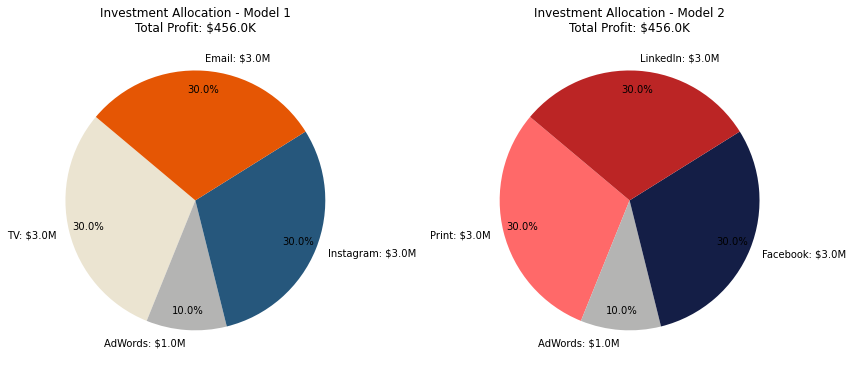

In [8]:
import matplotlib.pyplot as plt

# Define the investment allocation data for both models
investment_allocation_1 = {platform: x_model_1[platform].X for platform in platforms}
investment_allocation_2 = {platform: x_model_2[platform].X for platform in platforms}

# Divide the investment values by 1,000,000 to convert to millions
investment_allocation_1 = {platform: investment / 1_000_000 for platform, investment in investment_allocation_1.items()}
investment_allocation_2 = {platform: investment / 1_000_000 for platform, investment in investment_allocation_2.items()}

# Filter out platforms with non-zero allocation for both models
filtered_allocation_1 = {platform: allocation for platform, allocation in investment_allocation_1.items() if allocation > 0}
filtered_allocation_2 = {platform: allocation for platform, allocation in investment_allocation_2.items() if allocation > 0}

# Define custom colors for the pie charts
custom_colors_1 = ['#EBE4D1', '#B4B4B3', '#26577C', '#E55604']
custom_colors_2 = ['#FF6969', '#B4B4B3', '#141E46', '#BB2525']

# Create subplots with adjusted width for space between pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Add a border around each pie chart
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])  # Hide x-axis ticks
    ax.set_yticks([])  # Hide y-axis ticks

# Create pie chart for Model 1 with profit in the title
investment_labels_1 = [f"{platform}: ${investment:.1f}M" for platform, investment in filtered_allocation_1.items()]
axs[0].pie(
    filtered_allocation_1.values(),
    labels=investment_labels_1,
    autopct='%1.1f%%',  # Add percentage labels
    startangle=140,
    pctdistance=0.85,  # Control the distance of labels from the center
    colors=custom_colors_1,  # Use custom colors for slices
)
axs[0].set_title(f'Investment Allocation - Model 1\nTotal Profit: ${model_firm_1.objVal/1_000:.1f}K')

# Create pie chart for Model 2 with profit in the title
investment_labels_2 = [f"{platform}: ${investment:.1f}M" for platform, investment in filtered_allocation_2.items()]
axs[1].pie(
    filtered_allocation_2.values(),
    labels=investment_labels_2,
    autopct='%1.1f%%',  # Add percentage labels
    startangle=140,
    pctdistance=0.85,  # Control the distance of labels from the center
    colors=custom_colors_2,  # Use custom colors for slices
)
axs[1].set_title(f'Investment Allocation - Model 2\nTotal Profit: ${model_firm_2.objVal/1_000:.1f}K')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


### If we remove the constraint of NOT investing more than $3M per platform

In [9]:
# Total investment budget
total_budget = 10_000_000

platforms = roi_data.columns[1:]
model_firm_1_wo_plt_const = gp.Model("MarketingOptimization_Firm_1")

x_model_wo_plt_const = {platform: model_firm_1_wo_plt_const.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"x_{platform}_Firm_1")
     for platform in platforms}

total_roi = gp.quicksum(roi_data.at[0, platform] * x_model_wo_plt_const[platform] for platform in platforms)
model_firm_1_wo_plt_const.setObjective(total_roi, GRB.MAXIMIZE)

model_firm_1_wo_plt_const.addConstr(gp.quicksum(x_model_wo_plt_const[platform] for platform in platforms) <= total_budget)
model_firm_1_wo_plt_const.addConstr(x_model_wo_plt_const["Print"] + x_model_wo_plt_const["TV"] <= x_model_wo_plt_const["Facebook"] + x_model_wo_plt_const["Email"])
model_firm_1_wo_plt_const.addConstr(
    x_model_wo_plt_const["Facebook"] + x_model_wo_plt_const["LinkedIn"] + x_model_wo_plt_const["Instagram"] + x_model_wo_plt_const["Snapchat"] + x_model_wo_plt_const["Twitter"] >=
    2 * (x_model_wo_plt_const["SEO"] + x_model_wo_plt_const["AdWords"])
)

model_firm_1_wo_plt_const.Params.OutputFlag = 0 # tell gurobi to shut up!!
model_firm_1_wo_plt_const.optimize()

print(f"Firm_1 - Total Revenue: ${model_firm_1_wo_plt_const.objVal:.2f}")
for platform in platforms:
    print(f"{platform}: ${x_model_wo_plt_const[platform].X:.2f}")

print("\n")


Firm_1 - Total Revenue: $465000.00
Print: $0.00
TV: $5000000.00
SEO: $0.00
AdWords: $0.00
Facebook: $0.00
LinkedIn: $0.00
Instagram: $0.00
Snapchat: $0.00
Twitter: $0.00
Email: $5000000.00




In [10]:
# Total investment budget
total_budget = 10_000_000

platforms = roi_data.columns[1:]
model_firm_2_wo_plt_const = gp.Model("MarketingOptimization_Firm_1")

x_model_wo_plt_const_2 = {platform: model_firm_2_wo_plt_const.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"x_{platform}_Firm_1")
     for platform in platforms}

total_roi = gp.quicksum(roi_data.at[1, platform] * x_model_wo_plt_const_2[platform] for platform in platforms)
model_firm_2_wo_plt_const.setObjective(total_roi, GRB.MAXIMIZE)

model_firm_2_wo_plt_const.addConstr(gp.quicksum(x_model_wo_plt_const_2[platform] for platform in platforms) <= total_budget)
model_firm_2_wo_plt_const.addConstr(x_model_wo_plt_const_2["Print"] + x_model_wo_plt_const_2["TV"] <= x_model_wo_plt_const_2["Facebook"] + x_model_wo_plt_const_2["Email"])
model_firm_2_wo_plt_const.addConstr(
    x_model_wo_plt_const_2["Facebook"] + x_model_wo_plt_const_2["LinkedIn"] + x_model_wo_plt_const_2["Instagram"] + x_model_wo_plt_const_2["Snapchat"] + x_model_wo_plt_const_2["Twitter"] >=
    2 * (x_model_wo_plt_const_2["SEO"] + x_model_wo_plt_const_2["AdWords"])
)

model_firm_2_wo_plt_const.Params.OutputFlag = 0 # tell gurobi to shut up!!
model_firm_2_wo_plt_const.optimize()

print(f"Firm_1 - Total Revenue: ${model_firm_2_wo_plt_const.objVal:.2f}")
for platform in platforms:
    print(f"{platform}: ${x_model_wo_plt_const_2[platform].X:.2f}")

print("\n")


Firm_1 - Total Revenue: $465000.00
Print: $5000000.00
TV: $0.00
SEO: $0.00
AdWords: $0.00
Facebook: $5000000.00
LinkedIn: $0.00
Instagram: $0.00
Snapchat: $0.00
Twitter: $0.00
Email: $0.00




In [15]:
print(" Difference in Revenue without platform level constrain <= $3M: $", model_firm_2_wo_plt_const.objVal - model_firm_2.objVal)

 Difference in Revenue without platform level constrain <= $3M: $ 9000.0


### If we input the optimal allocation of Model 1 on the Model 2 Profit function and vice-versa...

In [16]:
model_1_rev_w_model_2_ROI = 0
model_2_rev_w_model_1_ROI = 0

for platform in platforms:
    model_1_rev_w_model_2_ROI += x_model_1[platform].X * roi_data.at[1, platform]
    model_2_rev_w_model_1_ROI += x_model_2[platform].X * roi_data.at[0, platform]
print("Model 1 Allocation on the Model 2 ROIs - $", model_1_rev_w_model_2_ROI)
print("Model 2 Allocation on the Model 1 ROIs - $", model_2_rev_w_model_1_ROI)


Model 1 Allocation on the Model 2 ROIs - $ 264000.0
Model 2 Allocation on the Model 1 ROIs - $ 252000.0


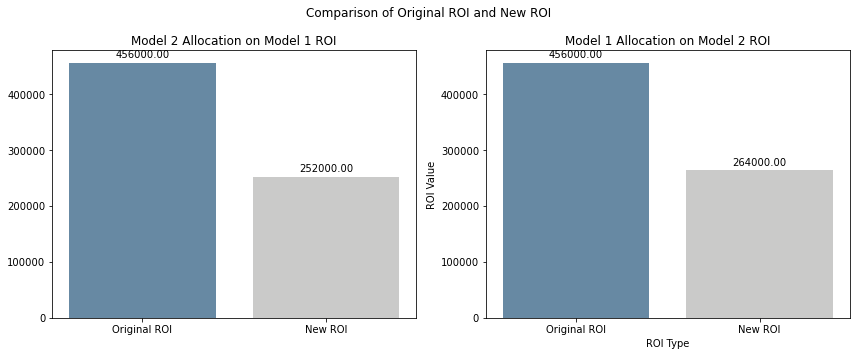

In [17]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Data for the original ROI and new ROI for both cases
Case_1 = [model_firm_1.objVal, model_2_rev_w_model_1_ROI]
Case_2 = [model_firm_2.objVal, model_1_rev_w_model_2_ROI]

# Labels for the bars
labels = ['Original ROI', 'New ROI']

# Bar positions
x = [0, 1]

# Create the first bar plot (Model 2 Allocation on Model 1 ROI)
bars1 = axs[0].bar(x, Case_1, tick_label=labels, color=['#26577C', '#B4B4B3'], alpha=0.7)
axs[0].set_title('Model 2 Allocation on Model 1 ROI')

# Create the second bar plot (Model 1 Allocation on Model 2 ROI)
bars2 = axs[1].bar(x, Case_2, tick_label=labels, color=['#26577C', '#B4B4B3'], alpha=0.7)
axs[1].set_title('Model 1 Allocation on Model 2 ROI')

# Set labels and title for the entire figure
fig.suptitle('Comparison of Original ROI and New ROI')
plt.xlabel('ROI Type')
plt.ylabel('ROI Value')

# Add data labels to the bars in the first subplot (Case 1)
def add_labels1(bars):
    for bar in bars:
        height = bar.get_height()
        axs[0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Add data labels to the bars in the second subplot (Case 2)
def add_labels2(bars):
    for bar in bars:
        height = bar.get_height()
        axs[1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_labels1(bars1)
add_labels2(bars2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### Now let's perform senstitivty analysis on this model

In [18]:
Sensitivity_Analysis = pd.DataFrame(0, index=platforms, columns=['ROI_1_Lower_Bound', 'ROI_1_Upper_Bound', 'ROI_2_Lower_Bound', 'ROI_2_Upper_Bound'])

Sensitivity_Analysis['ROI_1_Lower_Bound'] = model_firm_1.SAObjLow
Sensitivity_Analysis['ROI_1_Upper_Bound'] = model_firm_1.SAObjUp
Sensitivity_Analysis['ROI_2_Lower_Bound'] = model_firm_2.SAObjLow
Sensitivity_Analysis['ROI_2_Upper_Bound'] = model_firm_2.SAObjUp

Sensitivity_Analysis.replace(-np.inf, 0, inplace=True)

Sensitivity_Analysis = Sensitivity_Analysis*100

# Replace 'inf' values with a suitable representation (e.g., 'N/A')
# Sensitivity_Analysis.replace(np.inf, 'N/A', inplace=True)
# Round all numeric values to 2 decimal places
Sensitivity_Analysis = Sensitivity_Analysis.round(2)
# Concatenate the 'ROI_1_Lower_Bound' and 'ROI_1_Upper_Bound' columns for Model 1
Sensitivity_Analysis['Model_1_Sensitivity'] = (
    '(' + Sensitivity_Analysis['ROI_1_Lower_Bound'].astype(str) + ', ' +
    Sensitivity_Analysis['ROI_1_Upper_Bound'].astype(str) + ')'
)

# Concatenate the 'ROI_2_Lower_Bound' and 'ROI_2_Upper_Bound' columns for Model 2
Sensitivity_Analysis['Model_2_Sensitivity'] = (
    '(' + Sensitivity_Analysis['ROI_2_Lower_Bound'].astype(str) + ', ' +
    Sensitivity_Analysis['ROI_2_Upper_Bound'].astype(str) + ')'
)

# Display the resulting DataFrame
Sensitivity_Analysis[['Model_1_Sensitivity','Model_2_Sensitivity']]


,Model_1_Sensitivity,Model_2_Sensitivity
Print,"(0.0, 4.9)","(3.9, 5.2)"
TV,"(3.9, 6.2)","(0.0, 4.9)"
SEO,"(0.0, 3.9)","(0.0, 3.9)"
AdWords,"(3.3, 4.6)","(3.75, 4.6)"
Facebook,"(0.0, 2.9)","(2.9, inf)"
LinkedIn,"(0.0, 3.9)","(3.9, inf)"
Instagram,"(3.9, inf)","(0.0, 3.9)"
Snapchat,"(0.0, 3.9)","(0.0, 3.9)"
Twitter,"(0.0, 3.9)","(0.0, 3.9)"
Email,"(2.9, inf)","(0.0, 2.9)"


### Moving to month level optimization

In [19]:
Monthly_ROI = pd.read_csv("roi_mat.csv")
Monthly_ROI.rename(columns={'Unnamed: 0': 'Month'}, inplace=True)
Monthly_ROI.set_index('Month', inplace=True)

In [20]:
Monthly_ROI

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4


In [21]:
Marketing_Mod_3 = gp.Model()

# Decision variables for budget allocation - storing them in a dataframe
Marketingx_3 = pd.DataFrame(0, index=Monthly_ROI.index, columns=Monthly_ROI.columns)
for row_index, row in Marketingx_3.iterrows():
    for col_name in Marketingx_3.columns:
        Marketingx_3.at[row_index, col_name] = Marketing_Mod_3.addVar(ub=3)

#Creating another set of variables to store the ROIs of each month and use them to get the maximum budget for the next month
Marketingz = Marketing_Mod_3.addMVar(12, lb = 0)

In [22]:
# Setting constraints:

# Introducing a new constraints to simply tell Gurobi that the Marketingz variables are nothing but ROIs of each month
ROI_cons = Marketing_Mod_3.addConstrs(gp.quicksum(Marketingx_3.iloc[i,j]*Monthly_ROI.iloc[i,j]/100 for j in range(10)) == Marketingz[i] for i in range(12))

# Budget constraints have to be written separately for Jan and rest of the months 
#as Jan doesn't have additional investment from previou month's ROI
Budget_cons_Jan = Marketing_Mod_3.addConstr(gp.quicksum(Marketingx_3.iloc[0,j] for j in range(10)) <= 10)
Budget_cons_rest = Marketing_Mod_3.addConstrs(gp.quicksum(Marketingx_3.iloc[i,j] for j in range(10)) <= 10+ 0.5*Marketingz[i-1] for i in range (1,12))

Print_TV_cons = Marketing_Mod_3.addConstrs(Marketingx_3["Print"][i] + Marketingx_3["TV"][i] <= Marketingx_3["Facebook"][i] + Marketingx_3["Email"][i] for i in range(12))
Social_Media_cons = Marketing_Mod_3.addConstrs(gp.quicksum(Marketingx_3[Channel][i] for Channel in ["Facebook", "LinkedIn", "Instagram", "Snapchat", "Twitter"]) >= 2 * (Marketingx_3["SEO"][i] + Marketingx_3["AdWords"][i]) for i in range(12))

In [23]:
# Set the objective function: Maximize total ROI
#For the first 11 months we are only left with half of the ROI whereas for the last month we are left with the entire amount

Marketing_Mod_3.setObjective(gp.quicksum(0.5*Marketingz[i] for i in range(11))+ Marketingz[11], sense=gp.GRB.MAXIMIZE)

In [24]:
#Asking Gurobi to optimize
Marketing_Mod_3.Params.OutputFlag = 0 # tell gurobi to shut up!!
Marketing_Mod_3.optimize()

In [25]:
# Monthly investments for each month at the optimal point
Allocation_3 = pd.DataFrame(0, index=Monthly_ROI.index, columns=Monthly_ROI.columns)
for i in range (12):
    for j in range (10):
        Allocation_3.iloc[i,j] = Marketingx_3.iloc[i,j].x
        
Allocation_3 = Allocation_3.round(2)

Allocation_3

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,3.00,0.00,0,1.33,0.00,0,2.67,0,0.00,3.00
February,3.00,0.00,0,2.40,3.00,0,0.00,0,1.79,0.00
March,0.00,0.00,0,3.00,0.00,3,1.20,0,3.00,0.00
April,0.00,0.00,0,3.00,0.00,3,3.00,0,1.20,0.00
May,1.20,0.00,0,0.00,0.00,0,3.00,0,3.00,3.00
June,3.00,0.00,0,0.00,0.00,0,3.00,0,1.21,3.00
July,0.00,0.00,0,3.00,1.21,0,3.00,0,3.00,0.00
August,3.00,0.00,0,1.21,0.00,0,0.00,0,3.00,3.00
September,0.61,0.00,0,3.00,0.00,3,0.00,0,3.00,0.61


In [26]:
# Monthly ROIs for each month

Total_ROI = pd.DataFrame(0, index=Monthly_ROI.index, columns=['Total ROI'])

for i in range(12):
    Total_ROI.iloc[i,0] = Marketingz[i].x
    
Total_ROI = Total_ROI.round(2)

Total_ROI

,Total ROI
Month,
January,0.37
February,0.41
March,0.41
April,0.40
May,0.41
June,0.42
July,0.43
August,0.44
September,0.40


In [27]:
# Value of the objective function at optimal point, which is the amount we will be left with at the end of the year
# i.e., sum of half of ROIs of Jan-Nov and full ROI of Dec

Total_ROI_For_Year = Marketing_Mod_3.objVal

Total_ROI_For_Year

2.68449655386786

In [28]:
import copy

output_df = copy.deepcopy(Allocation_3)

output_df['Total Investment'] = Allocation_3.sum(axis = 1)
output_df['Profit'] = Total_ROI['Total ROI']
output_df['Next Month Carryon'] = (0.5*output_df['Profit']).round(2)

In [29]:
output_df

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total Investment,Profit,Next Month Carryon
Month,,,,,,,,,,,,,
January,3.00,0.00,0,1.33,0.00,0,2.67,0,0.00,3.00,10.00,0.37,0.18
February,3.00,0.00,0,2.40,3.00,0,0.00,0,1.79,0.00,10.19,0.41,0.20
March,0.00,0.00,0,3.00,0.00,3,1.20,0,3.00,0.00,10.20,0.41,0.20
April,0.00,0.00,0,3.00,0.00,3,3.00,0,1.20,0.00,10.20,0.40,0.20
May,1.20,0.00,0,0.00,0.00,0,3.00,0,3.00,3.00,10.20,0.41,0.20
June,3.00,0.00,0,0.00,0.00,0,3.00,0,1.21,3.00,10.21,0.42,0.21
July,0.00,0.00,0,3.00,1.21,0,3.00,0,3.00,0.00,10.21,0.43,0.22
August,3.00,0.00,0,1.21,0.00,0,0.00,0,3.00,3.00,10.21,0.44,0.22
September,0.61,0.00,0,3.00,0.00,3,0.00,0,3.00,0.61,10.22,0.40,0.20


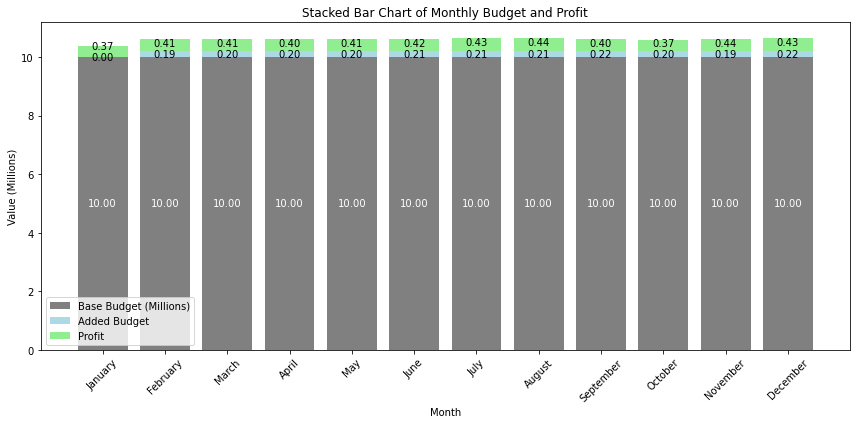

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

Base_Budget = 10

# Create a stacked bar chart
plt.figure(figsize=(12, 6))

# Stacked bars for Base Budget
plt.bar(output_df.index, Base_Budget, label='Base Budget (Millions)', color='gray')

# Stacked bars for Added Budget
plt.bar(output_df.index, output_df['Total Investment']-10, bottom=Base_Budget, label='Added Budget', color='lightblue')

# Stacked bars for Profit
plt.bar(output_df.index, output_df['Profit'], bottom=output_df['Total Investment'], label='Profit', color='lightgreen')

# Add data labels to each section of the bar
for i in range(len(output_df)):
    total_investment = output_df['Total Investment'][i]
    profit = output_df['Profit'][i]
    
    # Data labels for Base Budget
    plt.text(i, Base_Budget / 2, f'{Base_Budget:.2f}', ha='center', va='center', color='white')
    
    # Data labels for Added Budget
    plt.text(i, (Base_Budget + total_investment) / 2, f'{total_investment - Base_Budget:.2f}', ha='center', va='center', color='black')
    
    # Data labels for Profit
    plt.text(i, (Base_Budget + total_investment + profit) / 2, f'{profit:.2f}', ha='center', va='bottom', color='black')

plt.xlabel('Month')
plt.ylabel('Value (Millions)')
plt.title('Stacked Bar Chart of Monthly Budget and Profit')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.grid(False)
plt.show()


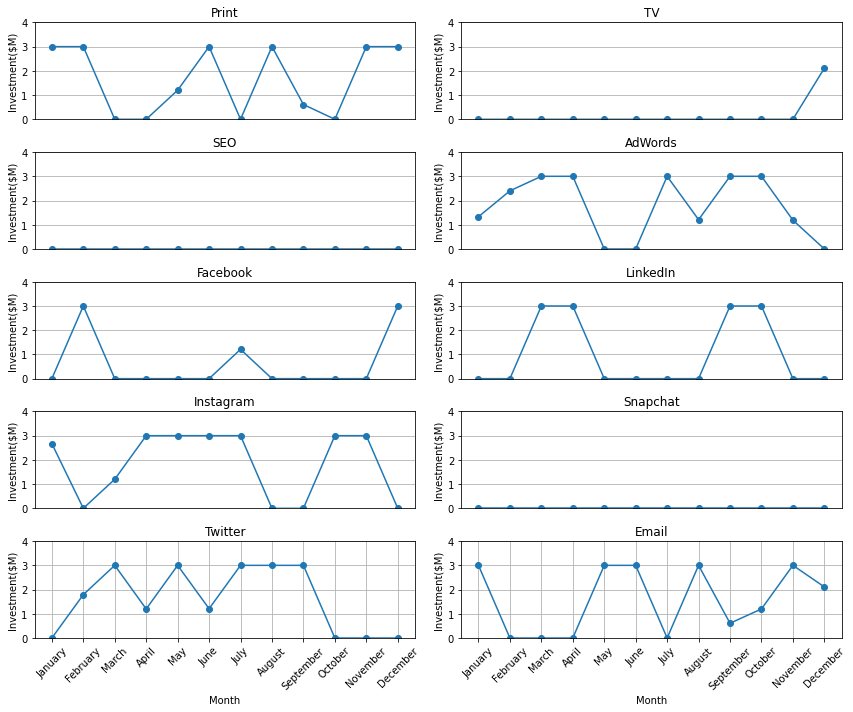

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

df = output_df[['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email']]

# Set up subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

# Define the platforms for each subplot
platforms = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email']

for i, platform in enumerate(platforms):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Plot the data
    ax.plot(df.index, df[platform], marker='o', label=platform)

    # Set X-axis labels only on the 5th and 10th chart
    if i in [8, 9]:
        ax.set_xlabel('Month')
        ax.set_xticks(df.index)
        ax.tick_params(axis='x', rotation=45)
    else:
        ax.set_xticks([])  # Hide X-axis labels

    ax.set_ylim(0, 4)  # Set Y-axis limits to start from 0 and have a scale of 1
    ax.set_yticks([0, 1, 2, 3, 4])  # Set Y-axis ticks
    ax.set_ylabel('Investment($M)')  # Set Y-axis label
    ax.set_title(platform)
    ax.grid(True)

plt.tight_layout()
plt.show()


### Regarding stable budget..

*The monthly allocations we have got is clearly not stable as there are fluctutations greater than 1 million in almost all the channels. To ensure that the budget is stable we will have to introduce another set of constraints - the absolute difference between allocation of (i+1)th month and the (i)th month for each channel should not be greater than 1M*

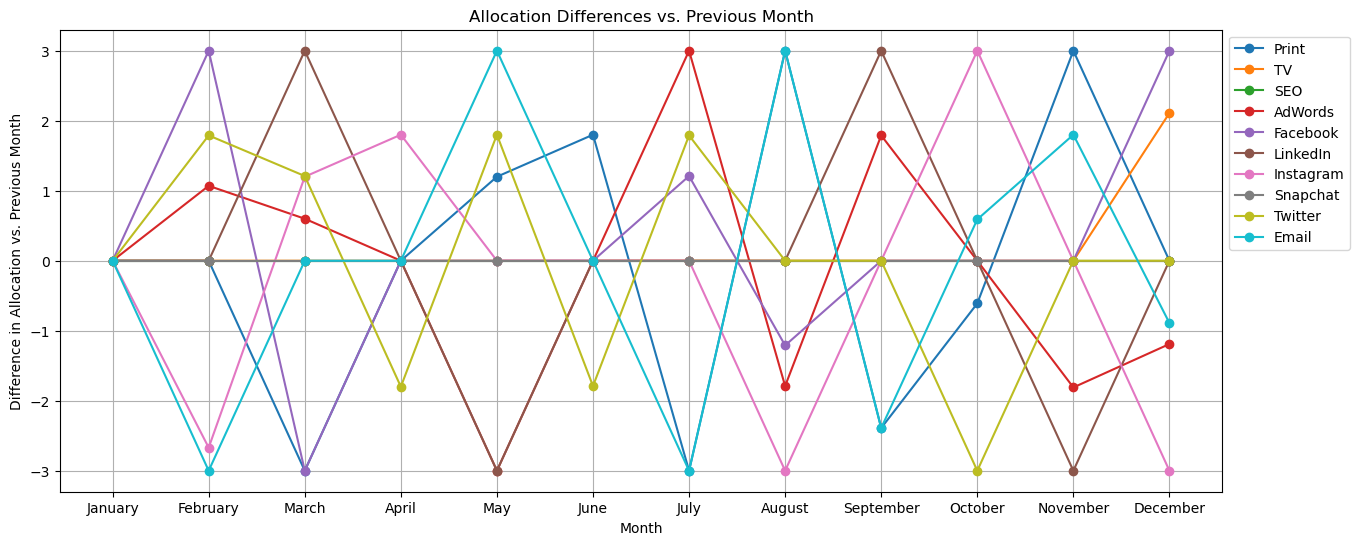

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the differences vs. the previous month
df_diff = df.diff().fillna(0)

# Create a line chart
plt.figure(figsize=(15, 6))

for channel in df.columns:
    plt.plot(df_diff.index, df_diff[channel], label=channel, marker='o')

plt.xlabel('Month')
plt.ylabel('Difference in Allocation vs. Previous Month')
plt.title('Allocation Differences vs. Previous Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()